# Homework 5


### 1 (10 pts)
Which of the following (select all that apply) is true for the binary classification confusion matrix report:
* a) it reports sizes of each cluster and number of the clusters;
* b) it is a square matrix;
* c) it is symmetrical;
* d) it has dimensions $2\times2$;
* e) it has dimensions $3\times3$;
* f) it reports the quality of classification fit over the test set;
* g) it reports the percentage of correctly classified datapoints over the test set;
* h) it reports the percentage of incorrectly classified datapoints over the test set;

### 2 (40 pts = 2+4+4+4+8$\times$2+10)
Read the data from https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/HWlogreg2.csv
and then use the first half as the training set, and the second half as the test set.
1. Initiate a logistic regression object for modeling, setting C = 10,000 to disable regularization
2. Run logistic regression on the training set
3. Print out the fitted parameters (including the intercept)
4. Use these parameters to predict on the test set
5. Draw two plots, first one showing your prediction, second one for the actual labels, with decision boundary in both
6. Calculate the confusion matrix to evaluate the model's performance, print out accuracy, recall and precision

### 3 (50pts = 4+4+5+9$\times$2+9+5$\times$2) (Extra credit 10pts in part 4)
Recall the last example of logistic regression where we were dealing with 3 classes based on the Iris data set, but we've only used the first two features, now let's try the other two.
1. Load Iris data from sklearn.datasets
2. Set up X and Y, where X includes the last two features and Y is the target variable (the labels)
3. Similarly, fit the whole dataset with LogisticRegression (No need to split the data into training and test)
4. Visualize the data by:
    * Draw a scatter plot of the data, paint the points with different colors if they are labeled differently
    * Draw the decision boundary *(10 extra points for painting the partition areas)*
5. Calculate and print out the confusion matrix
6. Calculate:
    * The precision of class 0 (the true first class among all predicted first class)
    * The accuracy of the model (correct labels)

# Solutions:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


# 1

a,b,d,f,g,h

# 2

In [2]:
data = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/HWlogreg2.csv')
train = data[:100]
test = data[100:]

In [3]:
#1
lr = LogisticRegression(C=1e5)
#2
lr.fit(train[['x1','x2']], train['y'])
#3
print(lr.coef_)
print(lr.intercept_)

[[ 0.72155727 -0.6981154 ]]
[-0.55296073]


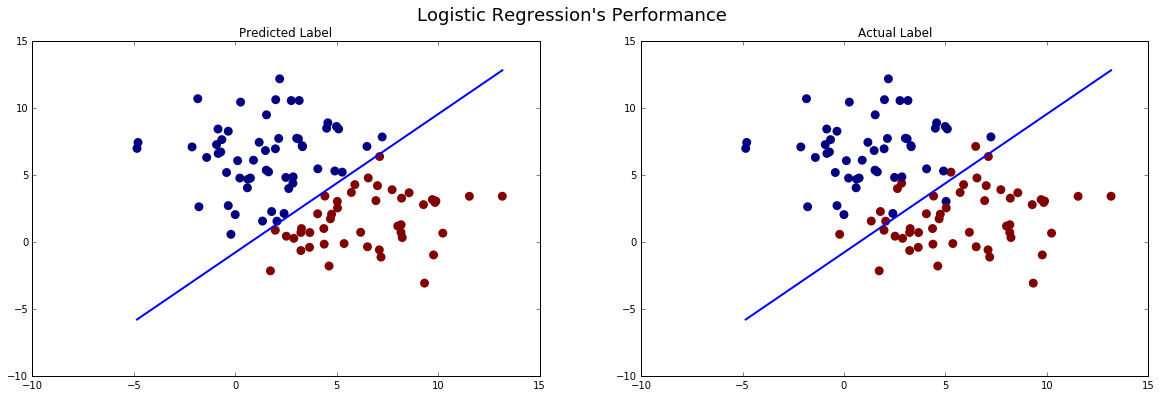

In [4]:
#4
labelPred = lr.predict(test[['x1','x2']])
#5
fig = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance", fontsize = 18)
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
#decision boundary
xplot = np.linspace(test.x1.min(),test.x1.max(),200)
yplot = -(lr.intercept_[0] + lr.coef_[0][0]*xplot)/lr.coef_[0][1]
ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)
ax1.set(title='Predicted Label')
ax2.set(title='Actual Label')
ax1.scatter(test.x1, test.x2, lw = 0, s = 80, c = labelPred)
ax2.scatter(test.x1, test.x2, lw = 0, s = 80, c = test.y)
plt.show()

In [5]:
#6
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(test.y==1))
FP = sum((labelPred==1)&(test.y==0))
FN = sum((labelPred==0)&(test.y==1))
TN = sum((labelPred==0)&(test.y==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 97.78%
Accuracy = 91.00%
Recall = 84.62%


# 3

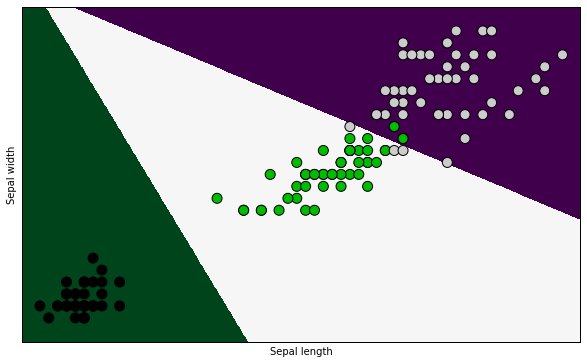

In [6]:
#1
from sklearn import datasets
iris = datasets.load_iris()
#2
X = iris.data[:, 2:]  # we only take the first two features.
Y = iris.target
#3
logreg = LogisticRegression(C = 1e6)
logreg.fit(X, Y)

#4
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig4 = plt.figure(3, figsize=(10, 6))
ax= fig4.add_subplot(111)

ax.pcolormesh(xx, yy, Z, cmap = plt.cm.PRGn_r)  # This is for extra credit--coloring partition areas

ax.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k', cmap=plt.cm.spectral)
ax.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())))
plt.show()

In [7]:
#5
from sklearn.metrics import confusion_matrix
#  1 pt for each entry
CM = confusion_matrix(Y, logreg.predict(X))
CM

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [8]:
#6
prec = 100.0 * 47/50
acc = 100.0 * np.diag(CM).sum()/CM.sum()
print('The precision of class 1: %.2f%%'%prec)
print('The accuracy of the model: %.2f%%'%acc)

The precision of class 1: 94.00%
The accuracy of the model: 96.00%
